# FM-223 Lista 8

Aluno: Vinícius Freitas de Almeida

$$
f(x) = \begin{cases} 
2 + \sqrt{2x - 1} & \text{if } 0 \leq x \leq c \\
\sqrt{2(1 - x)} & \text{if } c < x \leq 1 
\end{cases}
$$

$c = \frac{2 - \sqrt{2}}{2}$, $d = 2 - \sqrt{2}$.

In [74]:
import numpy as np
from numba import njit, jit
import matplotlib.pyplot as plt

In [75]:
@njit
def f(x, c):
    # x must lie in [0, 1]
    if x <= c:
        return 2 + np.sqrt(2)*(x - 1)
    else:
        return np.sqrt(2)*(1 - x)

In [76]:
@jit
def compute_counts(c, n, iterations):
    count = np.zeros(n)
    x0 = np.random.rand()
    for _ in range(iterations):
        x0 = f(x0, c)
        bin = int(x0 * n)
        count[bin] += 1
    count /= iterations
    return count

/tmp/ipykernel_43744/581986349.py:1: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit


In [77]:
n = 100
iterations = 1_000_000
c = (2 - np.sqrt(2))/2
count = compute_counts(c, n, iterations)

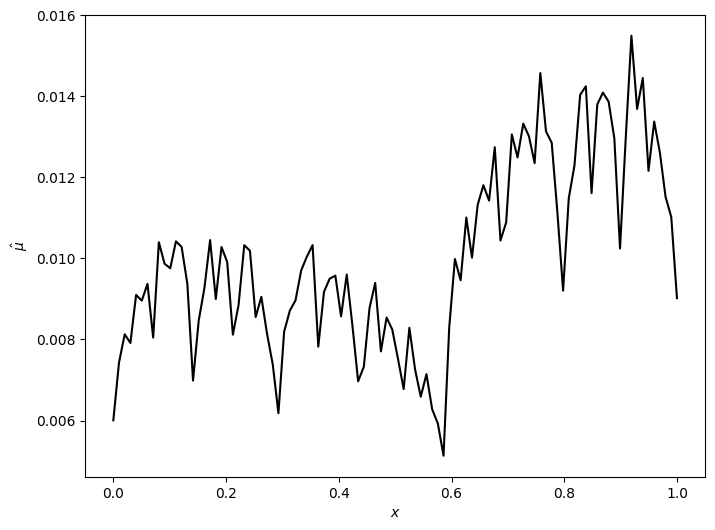

In [78]:
# figure and axis
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

x = np.linspace(0, 1, n)
ax.plot(x, count, color='black')
ax.set_xlabel('$x$')
ax.set_ylabel('$\hat{\mu}$')

# show the plot
plt.show()

In [79]:
@np.vectorize
def p(x, d):
    if x <= d:
        return 0.5/d
    else:
        return 1/(2**0.5 *d)

In [80]:
d = 2 - 2**0.5
xs = np.linspace(0, 1, 1000)
ys = p(xs, d)

Text(0, 0.5, '$p(x)$')

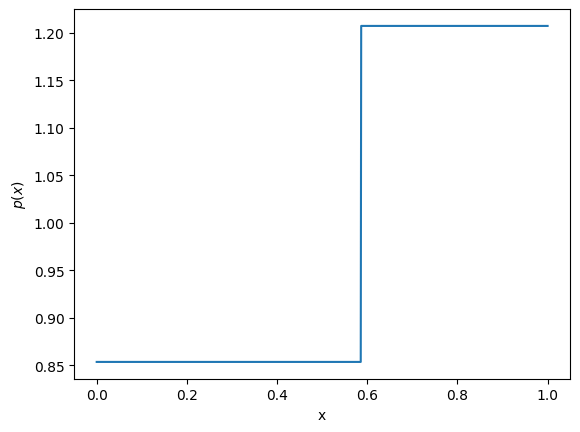

In [81]:
plt.plot(xs, ys, label='p(x)')
plt.xlabel('x')
plt.ylabel('$p(x)$')

# Exercício 2

The differential equation governing a linear oscillator, such as a spring moving according to Hooke's law, is 
$$ \ddot{x} + kx = 0 $$

(a) Convert to a sxstem of first-order equations.

(b) Sketch the phase plane.


Item a)

Seja $x_1 = x$ e $x_2 = \dot{x}$, então $\dot{x_1} = x_2$ e $\dot{x_2} = -kx_1$.

Logo, o sistema de equações diferenciais, expresso na forma matricial, é:

$$
\begin{bmatrix}
\dot{x_1} \\
\dot{x_2}
\end{bmatrix}
=
\begin{bmatrix}
0 & 1 \\
-k & 0
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
$$


Item b)

Agora, vamos plotar o sistema no espaço de fase. Colocamos $x_1$ no eixo das abscissas e $x_2$ no eixo das ordenadas.

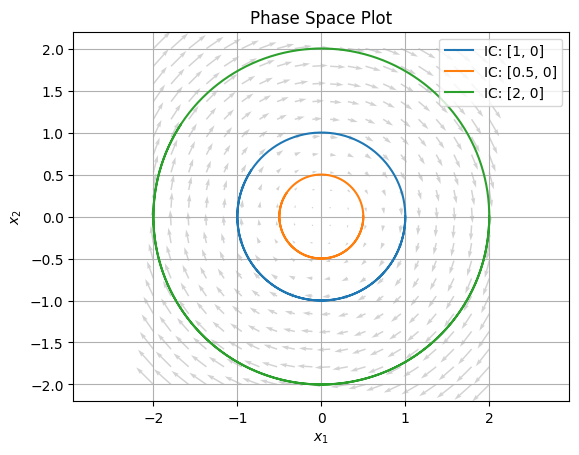

In [86]:
from scipy.integrate import solve_ivp

def system_of_odes(t, y, k):
    x1, x2 = y
    dx1dt = x2
    dx2dt = -k * x1
    return [dx1dt, dx2dt]

k = 1.0
t_span = [0, 10]
t_eval = np.linspace(t_span[0], t_span[1], 500)

initial_conditions = [
    [1, 0],
    [0.5, 0], 
    [2, 0]  
]

# Create a meshgrid for the quiver plot
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)

# Calculate the derivatives for each point in the meshgrid
U, V = system_of_odes(None, [X, Y], k)

plt.figure()

# Plot the quiver
plt.quiver(X, Y, U, V, color='lightgray', angles='xy')

for ic in initial_conditions:
    sol = solve_ivp(system_of_odes, t_span, ic, args=(k,), t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], label=f'IC: {ic}')

plt.title('Phase Space Plot')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


# Exercício 3

Consider the system:

$$
\begin{align*}
\dot{x} &= 2x - y \\
\dot{y} &= x^2 + 4y
\end{align*}
$$

Find equilibria and classify them as asymptotically stable, stable, or unstable.


Para encontrar os pontos de equilíbrio, basta igualar as equações a zero e resolver o sistema:

$$
\begin{align*}
2x^\ast - y^\ast &= 0 \\
(x^\ast)^2 + 4y^\ast &= 0
\end{align*}
$$

$$ \implies x^\ast = \frac{y^\ast}{2}$$
$$ \implies \left(\frac{y^\ast}{2}\right)^2 + 4y^\ast = 0$$
$$ \implies (y^\ast) ^2 + 16y^\ast = 0$$
$$ \implies y^\ast = 0 \text{ ou } y^\ast = -16$$
$$ \implies x^\ast = 0 \text{ ou } x^\ast = -8$$

Conjunto de pontos de equilíbrio: $\{(0, 0), (-8, -16)\}$.


Para classificar os pontos de equilíbrio, vamos calcular a matriz jacobiana do sistema:

$$
J(x,y) =
\begin{bmatrix}
2 & -1 \\
2x & 4
\end{bmatrix}
$$

Agora, vamos calcular a matriz jacobiana nos pontos de equilíbrio:

$$
J(0,0) =
\begin{bmatrix}
2 & -1 \\
0 & 4
\end{bmatrix}
$$

$$
J(-8,-16) =
\begin{bmatrix}
2 & -1 \\
-16 & 4
\end{bmatrix}
$$

Agora, vamos calcular os autovalores de cada matriz jacobiana:

$$
\begin{align*}
\det(J(0,0) - \lambda I) &= 0 \\
\det
\begin{bmatrix}
2 - \lambda & -1 \\
0 & 4 - \lambda
\end{bmatrix}

&= 0 \\
(2 - \lambda)(4 - \lambda) &= 0 \\
\lambda_1 = 2, \lambda_2 = 4
\end{align*}
$$

$$
\begin{align*}
\det(J(-8,-16) - \lambda I) &= 0 \\
\det
\begin{bmatrix}
2 - \lambda & -1 \\
-16 & 4 - \lambda
\end{bmatrix}

&= 0 \\
(2 - \lambda)(4 - \lambda) - 16 &= 0 \\
\lambda_1 = 3 - \sqrt{17}, \lambda_2 = 3 + \sqrt{17}
\end{align*}
$$

Como em ambos os pontos de equilíbrio podemos encontrar autovalores com partes reais positivas, podemos classificá-los como instáveis.


# Exercício 4

Let $\ddot{x} + \dot{x} + x + x^3 = 0$. Show that the equilibrium $(0, 0)$ is globally asymptotically stable.


Para provar que o ponto de equilíbrio é globalmente assintoticamente estável, vamos usar o teorema de Lyapunov. Primeiro, vamos definir uma função de Lyapunov:

$$V(x_1, x_2) = \frac{1}{2} x_2^2 + \frac{1}{2} x_1^2 + \frac{1}{4} x_1^4$$

Perceba que $V(0,0) = 0$ e $V(x_1, x_2) > 0$ para todo $(x_1, x_2) \neq (0,0)$. Além disso, $V$ é diferenciável, contínua e radialmente ilimitada, i.e. $\lim_{\|(x_1, x_2)\| \to \infty} V(x_1, x_2) = \infty$.

Agora, vamos calcular a derivada de $V$ em relação ao tempo:

$$\begin{aligned}
\dot{V} &= \frac{\partial V}{\partial x_1} \dot{x}_1 + \frac{\partial V}{\partial x_2} \dot{x}_2 \\
&= (x_1 + x_1^3) x_2 + x_2 (-x_2 - x_1 - x_1^3) \\
&= - x_2^2.
\end{aligned}$$

Como $\dot{V} < 0$ para todo $(x_1, x_2) \neq (0,0)$, podemos concluir que o ponto de equilíbrio é globalmente assintoticamente estável.

# Exercício 5

**Sketch the phase plane** in $ (x, \dot{x}) $ for the system $\dot{x} = x - ax^3$ for various values of $a$. 

**Find all stable and unstable equilibrium points.**

Pontos de equilíbrio de $\dot{x} = x - ax^3$:

$$
\begin{align*}
x - ax^3 &= 0 \\
x(1 - ax^2) &= 0 \\
x &= 0 \text{ ou } x = \pm \frac{1}{\sqrt{a}}, a \neq 0
\end{align*}
$$

Para saber a estabilidade dos pontos de equilíbrio, basta calcular $\ddot{x}$ em cada ponto de equilíbrio:

$$
\begin{align*}
\dot{x} &= x - ax^3 \\
\ddot{x} &= 1 - 3ax^2
\end{align*}
$$

$$
\begin{align*}
\ddot{x}(0) &= 1 \\
\ddot{x}\left(\frac{1}{\sqrt{a}}\right) &= -2 \\
\ddot{x}\left(-\frac{1}{\sqrt{a}}\right) &= -2
\end{align*}
$$

Logo, o ponto de equilíbrio $x=0$ é instável e os pontos de equilíbrio $x = \frac{1}{\sqrt{a}}$ e $x = -\frac{1}{\sqrt{a}}$ são estáveis.




In [135]:
def system_dynamics(x, a):
    return x - a * x**3

def system_of_odes(t, y, a):
    x1, x2 = y
    dx1dt = x1 - a * x1**3
    dx2dt = x2 - 3 * a * x1**2 * x2
    return [dx1dt, dx2dt]

def plot_phase_plane(a):
    t_span = [0, 10]
    t_eval = np.linspace(t_span[0], t_span[1], 500)

    ic_x1 = [0.5, -0.1, -1.3]
    initial_conditions = [[x1, system_dynamics(x1, a)] for x1 in ic_x1]

    # Create a meshgrid for the quiver plot
    x = np.linspace(-2, 2, 20)
    y = np.linspace(-2, 2, 20)
    X, Y = np.meshgrid(x, y)

    # Calculate the derivatives for each point in the meshgrid
    U, V = system_of_odes(None, [X, Y], a)

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    # Plot the quiver
    plt.quiver(X, Y, U, V, color='lightgray', angles='xy')

    for ic in initial_conditions:
        sol = solve_ivp(system_of_odes, t_span, ic, args=(a,), t_eval=t_eval)
        plt.plot(sol.y[0], sol.y[1], label=f'IC: ({ic[0]:.2f}, {ic[1]:.2f})')
    ax.set_title(f'Phase Space Plot (a = {a:.2f})')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.legend()
    ax.grid(True)
    plt.show()

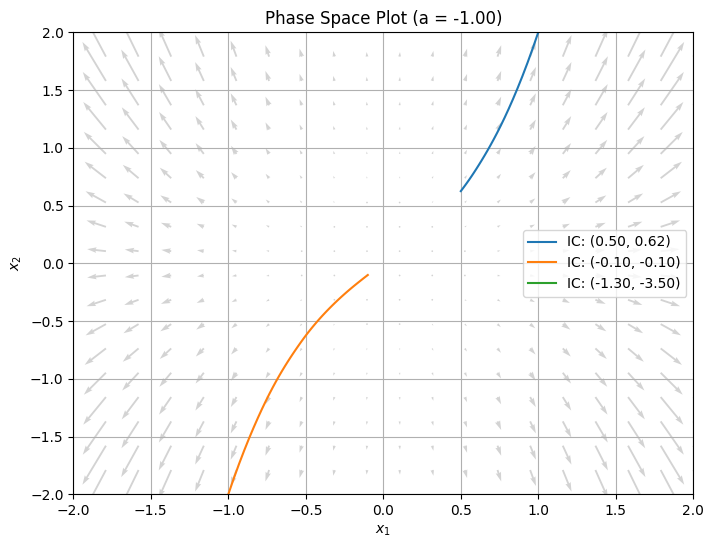

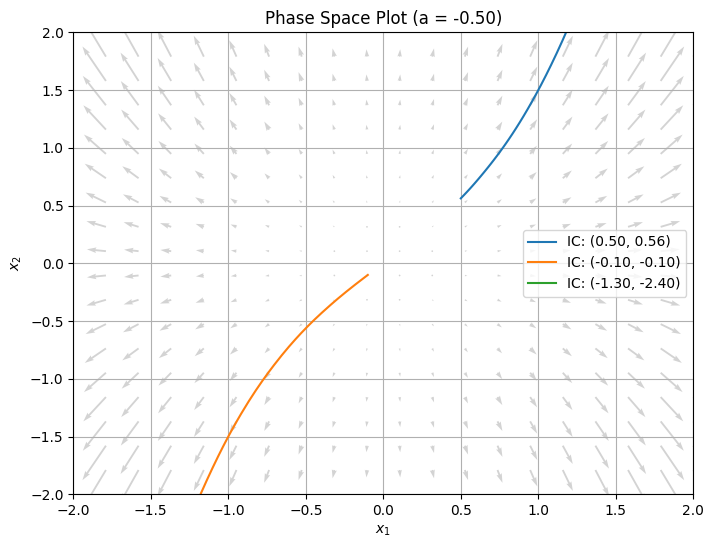

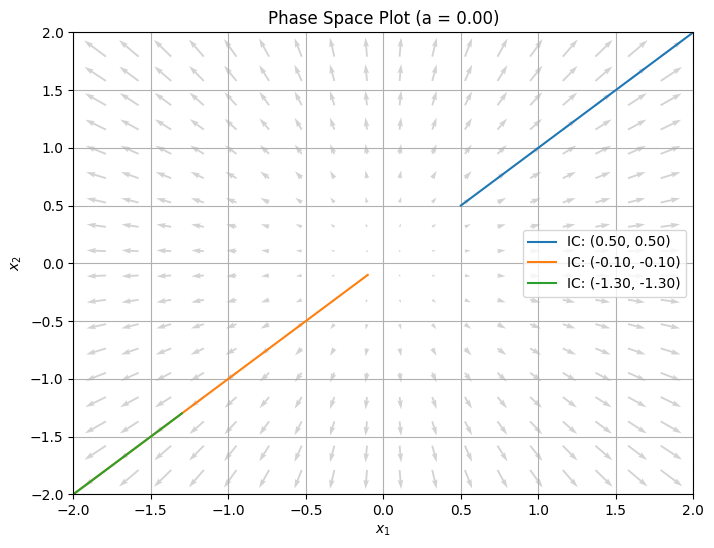

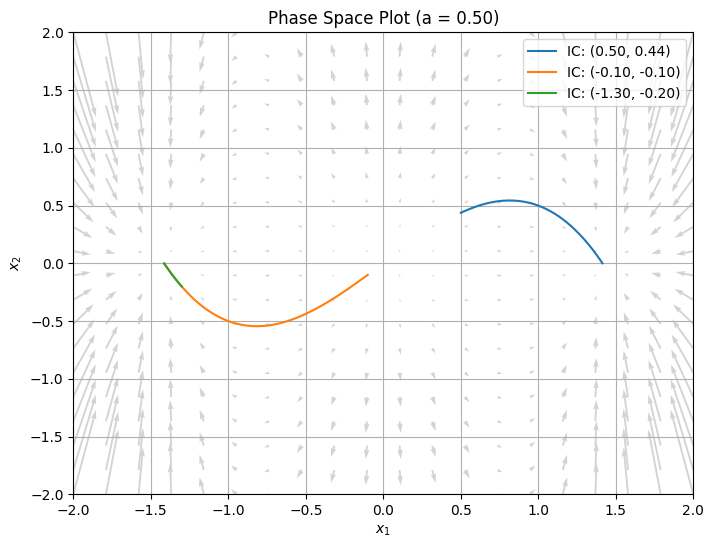

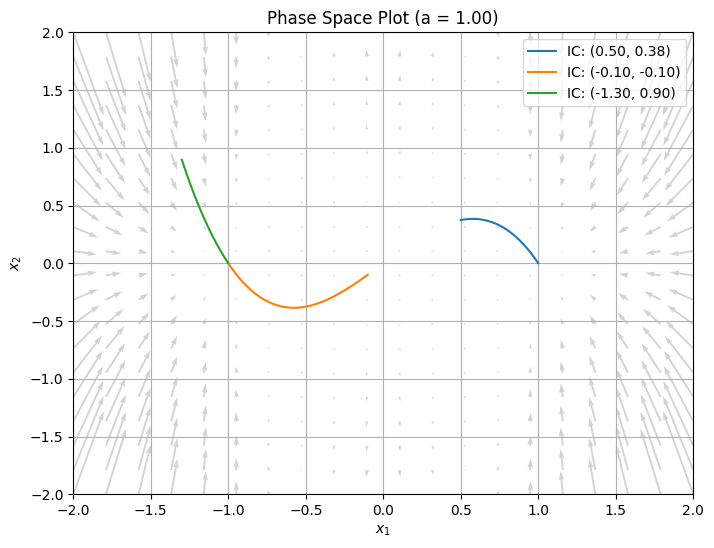

In [137]:
for a in [-1, -0.5, 0, 0.5, 1]:
    plot_phase_plane(a)